In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as panda

data = panda.read_csv("./drive/MyDrive/ECE473_Final_Project/deribit_options_chain_2019-07-01_OPTIONS.csv")

In [ ]:
btc = data.loc[data["symbol"].str.startswith('BTC-26JUL', na=False)]


In [ ]:
import requests

url = 'https://api.coingecko.com/api/v3/coins/bitcoin/history'
params = {
    'date': '26-07-2019'
}

response = requests.get(url, params=params)
data = response.json()['market_data']
btc_market_end = data['current_price']['usd']

params = {
    'date': '01-07-2019'
}

response = requests.get(url, params=params)
data = response.json()['market_data']
btc_market_start = data['current_price']['usd']

print(f"market_start = {btc_market_start}, market_end = {btc_market_end}")


market_start = 10888.097181679726, market_end = 9878.23193291115


In [ ]:
import numpy as np
import math
calls = btc.loc[btc['type'] == "call"]

strikes = calls["strike_price"].unique()
strikes.sort()

strikes = np.array( [ num for num in strikes if num <= btc_market_start] )

print(f"strikes: {strikes}\n")


print(f"market_start = {btc_market_start}, market_end = {btc_market_end}\n")

percents = (strikes - btc_market_start) / btc_market_start * 100

print(f"percent calls: {percents}\n")

holding = btc_market_end - btc_market_start


print(f"holding return: {holding}\n")


pchange =  (btc_market_end - btc_market_start) / btc_market_start 

print(f"percent change in price: {pchange*100}\n")

il_rate = 2 * math.pow((1+pchange), 0.5) / ( 1 + (1+pchange)) - 1

il_amount = il_rate*btc_market_end

print(f"impermanent loss : {il_amount}")

strike_returns = btc_market_end - strikes

#print(strike_returns)
for i, _ in enumerate(strike_returns):
    if strike_returns[i] < 0:
        strike_returns[i] = 0 

    

total_returns = strike_returns + il_amount 

print(f"total_returns : {total_returns}")

percents_2 = total_returns/btc_market_start*100

print(percents_2)








strikes: [ 4000  4500  5000  5500  6000  6500  7000  7500  8000  8500  9000  9500
 10000 10500]

market_start = 10888.097181679726, market_end = 9878.23193291115

percent calls: [-63.26263503 -58.67046441 -54.07829379 -49.48612317 -44.89395254
 -40.30178192 -35.7096113  -31.11744068 -26.52527006 -21.93309944
 -17.34092882 -12.74875819  -8.15658757  -3.56441695]

holding return: -1009.8652487685758

percent change in price: -9.274947053813696

impermanent loss : -11.687284167493745
total_returns : [5866.54464874 5366.54464874 4866.54464874 4366.54464874 3866.54464874
 3366.54464874 2866.54464874 2366.54464874 1866.54464874 1366.54464874
  866.54464874  366.54464874  -11.68728417  -11.68728417]
[53.88034797 49.28817735 44.69600673 40.10383611 35.51166548 30.91949486
 26.32732424 21.73515362 17.142983   12.55081238  7.95864176  3.36647113
 -0.10734001 -0.10734001]


[-49.48612317 -44.89395254 -40.30178192 -35.7096113  -31.11744068
 -26.52527006 -21.93309944 -17.34092882 -12.74875819  -8.15658757
  -3.56441695]
[40.10383611 35.51166548 30.91949486 26.32732424 21.73515362 17.142983
 12.55081238  7.95864176  3.36647113 -0.10734001 -0.10734001]
[  1.23269091   6.29432546  11.35596     16.41759455  21.47922909
  26.54086364  31.60249818  36.66413273  41.72576727  46.78740182
  51.84903636  61.97230546  72.09557455  82.21884364  92.34211273
 102.46538182 112.58865091]


TypeError: 'str' object is not callable

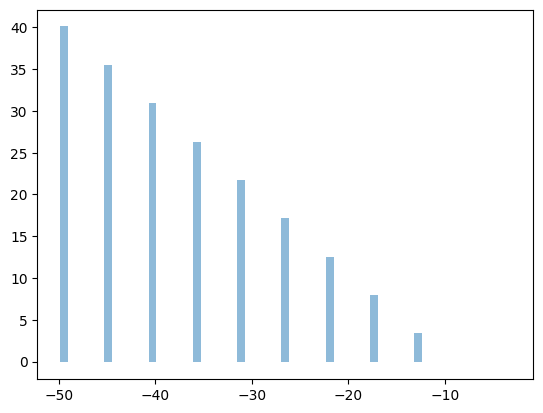

In [ ]:
import matplotlib.pyplot as plt

print(percents)
print(percents_2)

plt.bar(percents, percents_2, align='center', alpha=0.5)

plt.xlabel("percent hedge")
plt.ylabel("percent return")
plt.show()

In [ ]:
single_timestamp_jul26 = btc.loc[btc["timestamp"] == 1561971897296000]
single_timestamp_jul26

,exchange,symbol,timestamp,local_timestamp,type,strike_price,expiration,open_interest,last_price,bid_price,...,ask_iv,mark_price,mark_iv,underlying_index,underlying_price,delta,gamma,vega,theta,rho
3139552,deribit,BTC-26JUL19-9000-C,1561971897296000,1561971897313773,call,9000,1564128000000000,29.8,0.2215,0.2100,...,111.55,0.219101,98.54,SYN.BTC-26JUL19,11151.52,0.83165,0.00009,7.33248,-14.47755,4.67025
3139557,deribit,BTC-26JUL19-9000-P,1561971897296000,1561971897313813,put,9000,1564128000000000,309.7,0.0265,0.0230,...,101.31,0.026336,98.80,SYN.BTC-26JUL19,11151.52,-0.16881,0.00009,7.34542,-14.54111,-1.48782
3139559,deribit,BTC-26JUL19-20000-C,1561971897296000,1561971897313890,call,20000,1564128000000000,111.1,0.0020,0.0015,...,115.25,0.002718,108.44,SYN.BTC-26JUL19,11151.52,0.02753,0.00002,1.84700,-4.01296,0.18915
3139561,deribit,BTC-26JUL19-11500-C,1561971897296000,1561971897313908,call,11500,1564128000000000,36.8,0.0890,0.0880,...,104.56,0.089377,98.69,SYN.BTC-26JUL19,11151.52,0.50390,0.00014,11.63200,-23.00064,3.16043
3139563,deribit,BTC-26JUL19-6000-C,1561971897296000,1561971897313926,call,6000,1564128000000000,0.0,NaN,0.0055,...,NaN,0.463361,113.07,SYN.BTC-26JUL19,11151.52,0.98759,0.00001,0.93764,-2.12430,3.99684
3139564,deribit,BTC-26JUL19-20000-P,1561971897296000,1561971897316844,put,20000,1564128000000000,0.0,NaN,NaN,...,NaN,0.796573,110.62,SYN.BTC-26JUL19,11151.52,-0.96960,0.00002,2.00615,-4.44661,-13.46569
3139565,deribit,BTC-26JUL19-18000-C,1561971897296000,1561971897319308,call,18000,1564128000000000,296.1,0.0055,0.0045,...,110.83,0.006076,106.33,SYN.BTC-26JUL19,11151.52,0.05670,0.00004,3.32258,-7.07870,0.38599
3139566,deribit,BTC-26JUL19-10500-C,1561971897296000,1561971897319324,call,10500,1564128000000000,100.8,0.1130,0.1300,...,106.30,0.131500,98.63,SYN.BTC-26JUL19,11151.52,0.64147,0.00013,10.89331,-21.52697,3.88809
3139567,deribit,BTC-26JUL19-19000-C,1561971897296000,1561971897319333,call,19000,1564128000000000,55.5,0.0035,0.0030,...,113.33,0.004196,108.06,SYN.BTC-26JUL19,11151.52,0.04053,0.00003,2.53948,-5.49828,0.27698
3139573,deribit,BTC-26JUL19-7000-P,1561971897296000,1561971897319439,put,7000,1564128000000000,249.0,0.0030,0.0020,...,107.55,0.003352,101.57,SYN.BTC-26JUL19,11151.52,-0.02964,0.00002,1.96397,-3.99682,-0.25151


In [ ]:
headers = data.head()
# 1561971897296000

,exchange,symbol,timestamp,local_timestamp,type,strike_price,expiration,open_interest,last_price,bid_price,...,ask_iv,mark_price,mark_iv,underlying_index,underlying_price,delta,gamma,vega,theta,rho
0,deribit,ETH-5JUL19-480-P,1561939198062000,1561939200397641,put,480,1562313600000000,0.0,NaN,NaN,...,NaN,0.652858,0.00,SYN.ETH-5JUL19,290.38,-1.00000,0.00000,0.00000,0.00000,-0.05699
1,deribit,ETH-5JUL19-480-C,1561939195950000,1561939200397649,call,480,1562313600000000,1.0,0.004,NaN,...,NaN,0.000009,130.02,SYN.ETH-5JUL19,290.24,0.00025,0.00002,0.00030,-0.00251,0.00001
2,deribit,ETH-5JUL19-460-P,1561939198949000,1561939200397705,put,460,1562313600000000,0.0,NaN,NaN,...,NaN,0.584008,0.00,SYN.ETH-5JUL19,290.38,-1.00000,0.00000,0.00000,0.00000,-0.05461
3,deribit,ETH-5JUL19-460-C,1561939199949000,1561939200397712,call,460,1562313600000000,71.0,0.005,NaN,...,NaN,0.000028,129.97,SYN.ETH-5JUL19,290.41,0.00074,0.00006,0.00081,-0.00801,0.00002
4,deribit,ETH-5JUL19-440-P,1561939195950000,1561939200397717,put,440,1562313600000000,0.0,NaN,NaN,...,NaN,0.515980,0.00,SYN.ETH-5JUL19,290.24,-1.00000,0.00000,0.00000,0.00000,-0.05224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,deribit,ETH-26JUL19-160-C,1561939200953000,1561939200971598,call,160,1564128000000000,0.0,NaN,NaN,...,NaN,0.453431,98.36,SYN.ETH-26JUL19,292.39,0.99298,0.00026,0.01505,-0.02922,0.10949
496,deribit,ETH-26JUL19-360-C,1561939200954000,1561939200971607,call,360,1564128000000000,2903.0,0.034,0.03,...,101.64,0.033552,97.55,SYN.ETH-26JUL19,292.39,0.24797,0.00421,0.24373,-0.46926,0.04351
497,deribit,ETH-5JUL19-380-C,1561939200953000,1561939200971611,call,380,1562313600000000,628.0,0.004,NaN,...,150.81,0.001505,126.24,SYN.ETH-5JUL19,290.42,0.02966,0.00169,0.02133,-0.31068,0.00097
498,deribit,ETH-12JUL19-400-P,1561939200954000,1561939200971617,put,400,1562918400000000,0.0,NaN,NaN,...,NaN,0.378655,108.34,SYN.ETH-12JUL19,291.07,-0.94175,0.00209,0.05970,-0.28533,-0.11934


In [ ]:
tails = data.tail()
tails

,exchange,symbol,timestamp,local_timestamp,type,strike_price,expiration,open_interest,last_price,bid_price,...,ask_iv,mark_price,mark_iv,underlying_index,underlying_price,delta,gamma,vega,theta,rho
8917607,deribit,BTC-26JUL19-19000-C,1562025599358000,1562025599364083,call,19000,1564128000000000,65.5,0.0020,0.0015,...,117.66,0.003032,110.36,SYN.BTC-26JUL19,10684.79,0.03021,0.00002,1.88808,-4.28136,0.19360
8917608,deribit,BTC-26JUL19-16000-P,1562025599357000,1562025599364091,put,16000,1564128000000000,5.0,0.2255,NaN,...,NaN,0.508187,106.99,SYN.BTC-26JUL19,10684.79,-0.90718,0.00006,4.58384,-10.07684,-10.08190
8917609,deribit,BTC-12JUL19-14500-C,1562025599359000,1562025599364101,call,14500,1562918400000000,129.5,0.0025,0.0020,...,116.64,0.003778,108.11,SYN.BTC-12JUL19,10623.39,0.05269,0.00006,1.92196,-10.05361,0.14710
8917610,deribit,BTC-27DEC19-22000-P,1562025599388000,1562025599388781,put,22000,1577433600000000,0.0,NaN,0.0055,...,500.00,1.063208,102.28,BTC-27DEC19,11138.41,-0.72395,0.00004,26.02734,-7.46366,-97.25790
8917611,deribit,BTC-27DEC19-24000-P,1562025599391000,1562025599391832,put,24000,1577433600000000,0.0,NaN,0.0055,...,500.00,1.229215,103.09,BTC-27DEC19,11138.41,-0.75960,0.00004,24.22558,-7.00220,-108.23221


In [ ]:
data.columns

Index(['exchange', 'symbol', 'timestamp', 'local_timestamp', 'type',
       'strike_price', 'expiration', 'open_interest', 'last_price',
       'bid_price', 'bid_amount', 'bid_iv', 'ask_price', 'ask_amount',
       'ask_iv', 'mark_price', 'mark_iv', 'underlying_index',
       'underlying_price', 'delta', 'gamma', 'vega', 'theta', 'rho'],
      dtype='object')

In [ ]:
symbols = data.loc[:, "symbol"]
for i, symbol in enumerate(symbols):
    if i < 250:
        print(symbols[i])

AttributeError: 'dict' object has no attribute 'loc'

In [ ]:
import requests

url = 'https://api.coingecko.com/api/v3/coins/bitcoin/history'
params = {
    'date': '03-07-2019'
}

response = requests.get(url, params=params)
data = response.json()['market_data']
bitcoin_price = data['current_price']['usd']

print(f"The Bitcoin price on Unix timestamp 1562025599358000 was ${bitcoin_price:.2f}")


The Bitcoin price on Unix timestamp 1562025599358000 was $10822.76
